# 离散余弦变换

离散余弦变换(DCT)与离散傅里叶变换(DFT)密切相关。DFT实际上是计算序列DCT的一个步骤。然而，DCT比DFT具有更好的能量压缩能力，其中只有几个变换系数代表了序列中能量的大部分。DCT的这一特性使得它在数据通信和信号编码等应用中非常有用。
DCT变体
DCT有四个标准变体。对于长度为N的信号x，对于  (KroneckerDelta)，转换由以下方法定义：
DCT-1:
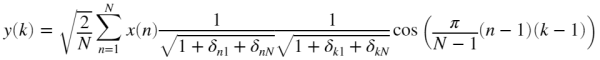    
DCT-2
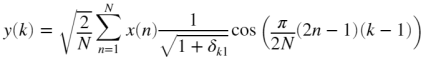
DCT-3:
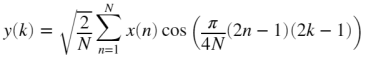
DCT-4: 
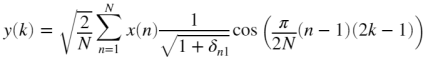
信号处理工具箱函数DCT计算输入阵列的酉DCT。
逆DCT变体
DCT的所有变体都是幺正(或者，相当于，正交)：要找到他们的逆词，切换k和n在每个定义中。DCT-1和DCT-4是各自的逆。DCT-2和DCT-3是相互对立的：
逆DCT-1:
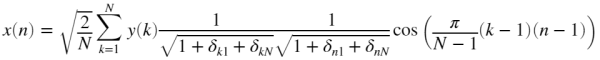
逆DCT-2:
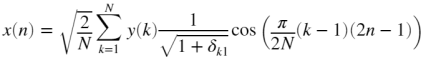
逆DCT-3:
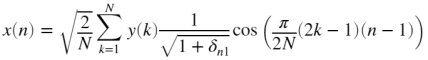
逆DCT-4:
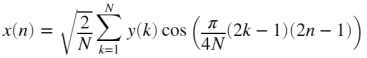
函数idct计算输入序列的逆DCT，从完整或部分DCT系数集重构信号。
基于DCT的信号重构
由于DCT的能量压缩特性，您可以从其DCT系数的一小部分重构一个信号。例如，产生一个25赫兹正弦序列采样在1000赫兹。计算此序列的DCT并仅使用值大于0.1的分量重构信号。确定原始1000中有多少系数满足要求，并且绘制原始序列和重建序列。

64
1.9436943115701537


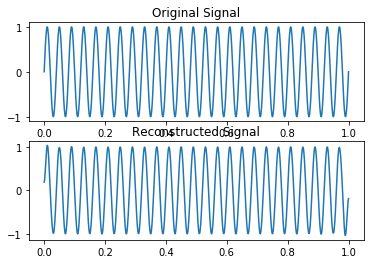

In [3]:
import numpy as np
from scipy.fftpack import dct,idct
import matplotlib.pyplot as plt
t=np.arange(0,1.001,1/1000)
x=np.sin(2*np.pi*25*t)
y=dct(x,norm='ortho')
y2=np.argwhere(abs(y)<0.1)
y2=y2.reshape(len(y2))
y[y2]=np.zeros(np.size(y2))
z=idct(y,norm='ortho')
howmany=len(np.argwhere(y))
print(howmany)
print(np.linalg.norm(x-z)/np.linalg.norm(x)*100)
plt.subplot(211)
plt.title('Original Signal')
plt.plot(t,x)
plt.subplot(212)
plt.plot(t,z)
plt.title('Reconstructed Signal')
plt.show()